<h2>Helper Notebook for Creating Code Flow Data</h2>

In [1]:
# REYeker lib
import modules.rEYEkerAnalysis as rEYEker

# lib for dataframes
import pandas as pd

# lib for plotting
from matplotlib import pyplot as plt

# lib for crerating paths
from pathlib import Path

<h3>Config</h3>

In [7]:
#image to load
image_path = 'images/BR/BR_ReverseString.png'

#name for excel file saved in ./data/code_flow folder
save_as = 'BR_ReverseString'

#use input for code sequence, otherwise eddit code
get_input = False

#show lines in the visualization of code flow
show_lines = True


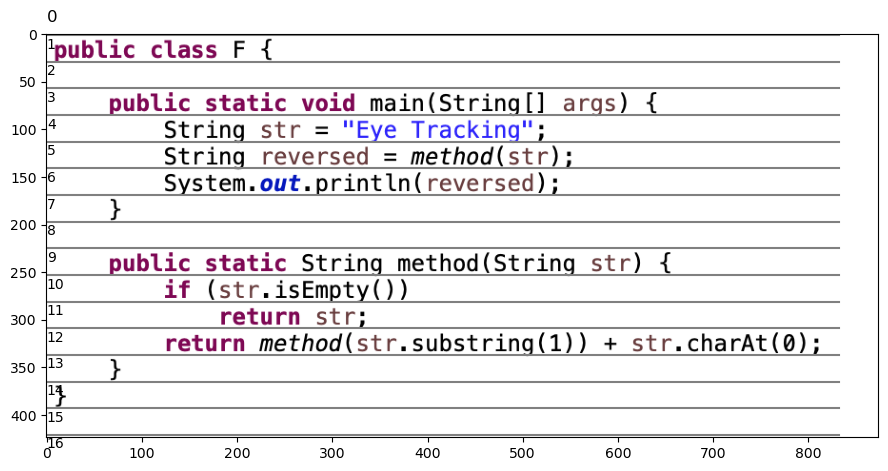

In [8]:
# config
offset = 1
height_of_line = 28
fontsize = 12

# calculation
ranges = []

img = rEYEker.load_image(image_path)
height = img.shape[0]
width = img.shape[1]

rEYEker.display(img, normal_size=True, should_plot=False)

i=0
dirty = 0
if offset>0:
    ranges.append((0, offset))
    plt.text(0, offset-height_of_line/2, str(i), fontsize=fontsize)
    i+=1
    dirty = 1
    
for idx, val in enumerate(range(offset, height, height_of_line)):
    plt.text(0, val+height_of_line/2, str(idx+i))
    plt.plot([0, width], [val, val], color='grey')
    ranges.append((val+dirty, min(val+height_of_line, height -1)))
    dirty = 1

plt.show()

Set Code flow based on lines

In [9]:
code_flow_input = []

if get_input:
    code_flow_input = input("Pleas Input the Line numbers of Codeflow with a space:")
else:
   #BI ReverseString code_flow_input = "2 4 5 8 9 10 11 13 14 15 16 14 15 16 14 15 16 14 15 16 14 15 16 14 15 16 14 15 16 14 15 16 14 15 16 18"
   #TI ReverseString  code_flow_input = "2 4 5 8 9 10 11 13 14 15 17 14 15 17 14 15 17 14 15 17 14 15 17 14 15 17 14 15 17 14 15 17 14 15 17 19"
   #TR ReverseString code_flow_input = "3 5 6 9 12 9 12 9 12 9 12 9 12 9 12 9 12 9 12 9 12"
   #BR Reverse String code_flow_input = "3 5 6 9 12 9 12 9 12 9 12 9 12 9 12 9 12 9 12 9 12"
    
code_flow_array = [int(x) for x in code_flow_input.strip().split(' ')]

Make test visiualization for checking

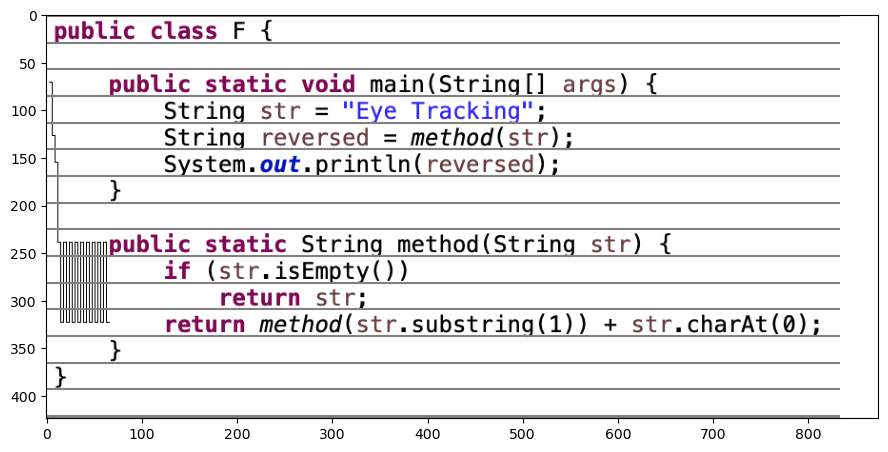

In [10]:
visualization_data = [(0, int((ranges[num][0]+ranges[num][1])/2)) for num in code_flow_array]
visualization_img = rEYEker.draw_vertical_line_diagram(img, visualization_data, should_copy=True)

rEYEker.display(visualization_img, normal_size=True, should_plot=False)
if show_lines:
    for tup in ranges:
        plt.plot([0, width], [tup[1], tup[1]], color='grey')
plt.show()

save Data to Excel

In [11]:
cols = ["start", "stop"]
tmp_list = []
for (start, stop) in ranges:
    tmp_list.append([start, stop])
    
df_config = pd.DataFrame(tmp_list, columns=cols)
df_values = pd.DataFrame(code_flow_array, columns=['code flow'])

folder = "./data/code_flow/"
Path(folder).mkdir(parents=True, exist_ok=True)

writer = pd.ExcelWriter(folder + save_as + '.xlsx', engine='xlsxwriter')
df_config.to_excel(writer, sheet_name="config", index=False)
df_values.to_excel(writer, sheet_name="values", index=False)

writer.save()